In [169]:
import pandas as pd

df = pd.DataFrame({
    'age': ('youth','youth','middle_aged','senior','senior','senior',
            'middle_aged','youth','youth','senior','youth','middle_aged',
            'middle_aged','senior'),
    'income': ('high','high','high','medium','low','low','low','medium',
                'low','medium','medium','medium','high','medium'),
    'student': ('no','no','no','no','yes','yes','yes','no','yes','yes',
                'yes','no','yes','no'),
    'credit_rating': ('fair','excellent','fair','fair','fair','excellent',
                        'excellent','fair','fair','fair','excellent','excellent','fair','excellent'),
    'buys_computer': ('no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no')
})

In [170]:
from sklearn.preprocessing import LabelEncoder

le_age = LabelEncoder()
df['age'] = le_age.fit_transform(df['age'])
keys = le_age.classes_
value = le_age.transform(keys)
list_age = dict(zip(keys, value))
print(list_age)

{'middle_aged': 0, 'senior': 1, 'youth': 2}


In [171]:
le_income = LabelEncoder()
df['income'] = le_income.fit_transform(df['income'])
keys = le_income.classes_
value = le_income.transform(keys)
list_income = dict(zip(keys, value))
print(list_income)

{'high': 0, 'low': 1, 'medium': 2}


In [172]:
le_student = LabelEncoder()
df['student'] = le_student.fit_transform(df['student'])
keys = le_student.classes_
value = le_student.transform(keys)
list_student = dict(zip(keys, value))
print(list_student)

{'no': 0, 'yes': 1}


In [173]:
le_credits_rating = LabelEncoder()
df['credit_rating'] = le_credits_rating.fit_transform(df['credit_rating'])
keys = le_credits_rating.classes_
value = le_credits_rating.transform(keys)
list_credit_rating = dict(zip(keys, value))
print(list_credit_rating)

{'excellent': 0, 'fair': 1}


In [174]:
from sklearn.model_selection import train_test_split

X = df.drop('buys_computer', axis=1)
y = df['buys_computer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)

In [175]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)

y_predic = dtc.predict(X_test)
print('Decision Tree Model score:', dtc.score(X_test, y_test))

Decision Tree Model score: 0.6


<Figure size 720x720 with 0 Axes>

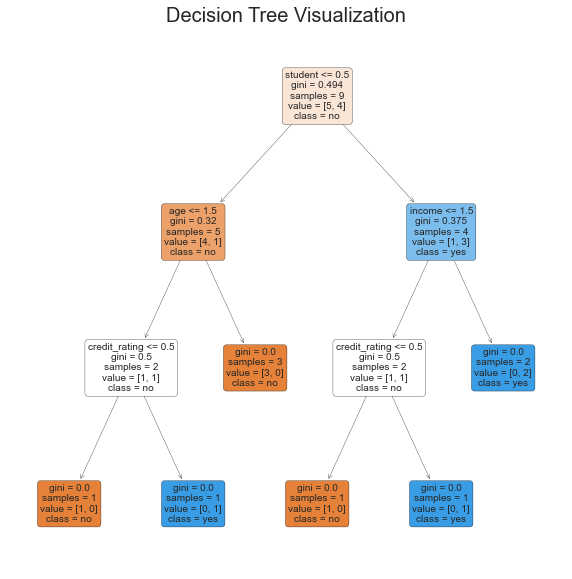

In [176]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,10))
plt.subplots(figsize=(10,10))
plot_tree(dtc, fontsize=10, max_depth=3, filled=True, rounded=True, class_names=sorted(y.unique()),
            feature_names=['age','income','student','credit_rating'])
plt.title("Decision Tree Visualization", fontsize=20)
plt.savefig("dtc.png")
plt.show()

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

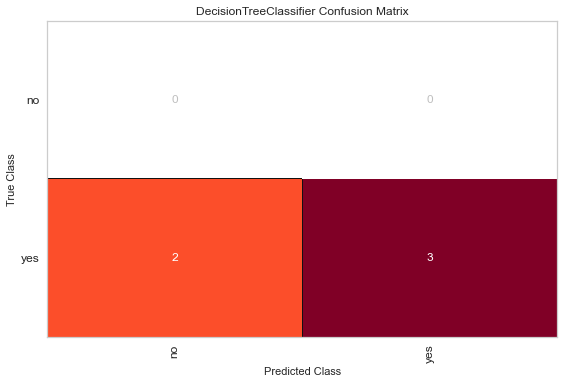

In [177]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(dtc)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show(outpath='cm_buys_computer.png')

C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

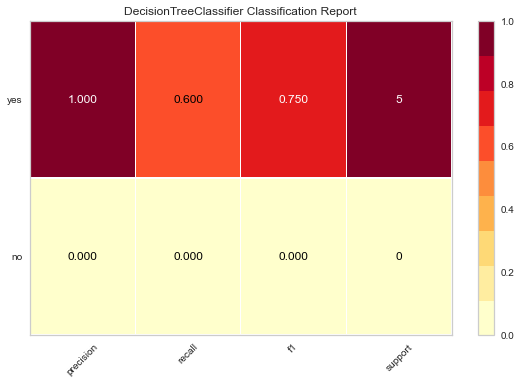

In [178]:
from yellowbrick.classifier import ClassificationReport

cr = ClassificationReport(dtc, support=True)
cr.fit(X_train, y_train)
cr.score(X_test, y_test)
cr.show(outpath='cr_buys_computer.png')

In [179]:
import numpy as np
new_df = np.array([2, 2, 1, 1])

prediction = dtc.predict(new_df.reshape(1,-1))
print("Hasil prediksi:", prediction)

Hasil prediksi: ['yes']
